<a href="https://colab.research.google.com/github/tamberohit49/Colab-Projects/blob/main/Confidence_Interval_%26_CLT_Wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wallmart case Study

Defining Problem Statement and Analysing basic metrics

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson

**Initial Data Analysis**

In [ ]:
df=pd.read_csv('/content/wallmart.csv')

NameError: name 'pd' is not defined

In [ ]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0


In [ ]:
df.shape

(166385, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166385 entries, 0 to 166384
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166385 non-null  int64  
 1   Product_ID                  166385 non-null  object 
 2   Gender                      166385 non-null  object 
 3   Age                         166385 non-null  object 
 4   Occupation                  166384 non-null  float64
 5   City_Category               166384 non-null  object 
 6   Stay_In_Current_City_Years  166384 non-null  object 
 7   Marital_Status              166384 non-null  float64
 8   Product_Category            166384 non-null  float64
 9   Purchase                    166384 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 12.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,1.663850e+05,166384.000000,166384.000000,166384.000000,166384.000000
mean,1.002884e+06,8.088073,0.409769,5.293195,9309.120060
std,1.758747e+03,6.543883,0.491792,3.738390,4979.245199
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001303e+06,2.000000,0.000000,1.000000,5852.000000
50%,1.002870e+06,7.000000,0.000000,5.000000,8053.000000
75%,1.004381e+06,14.000000,1.000000,8.000000,12060.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


In [ ]:
#Count of unique users in the dataset?

df['User_ID'].nunique()

5885

In [ ]:
#How many products are there?

df['Product_ID'].nunique()

3441

In [ ]:
# Count Of unique Customers
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1664
M    4221
Name: User_ID, dtype: int64

In [ ]:
#Checking for Purchase amount details based on genders

df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,41005.0,8778.514206,4698.696061,188.0,5448.0,7924.0,11420.0,23948.0
M,125379.0,9482.653850,5055.576570,185.0,5890.0,8105.0,12523.0,23961.0


Insights :

1) The data has in total 15, 300 rows and 10 Columns of which most
of the data is categorical.

2) We have in total 5788 Unique customers and 3312 unique products

**Checking for Null values**

In [ ]:
#identifying Null Values

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [ ]:
#Removing Null Values

df.drop(df.index[-1],inplace=True)
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Insights

1) We have a clean dataset with a single null value.

2) Null values removed to perform the further analysis

**Univariate Analysis**

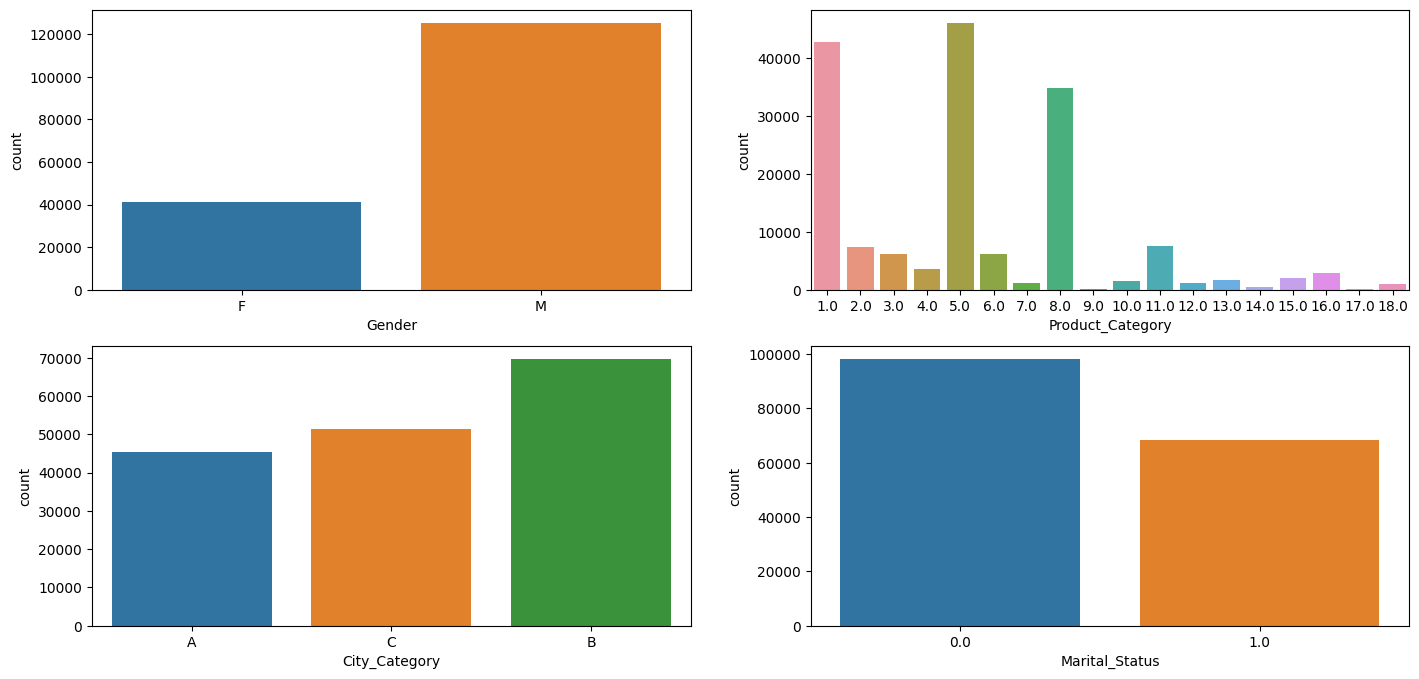

In [ ]:
# Visual Representation wrt multiple parameters


categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 8))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Product_Category', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])

plt.show()

# 1) We can clearly infer that from the gender count plot we have male customer count far greater than the female.
# 2) maximum product catery sold is 5.0 followed by 1.0 and 8.0.
# 3) When compared city category we found city B has the highest count followed by city C & A
# 4) When compared the maratial status, we found that the count of purchased by m arried people was higher than the count of unmarried people

Insights:

1) We can clearly infer that from the gender count plot we have male
customer count far greater than the female.

2) maximum product category sold is 5.0 followed by 1.0 and 8.0.

3) When compared city category we found city B has the highest count
followed by city C & A

4) When compared the martial status, we found that the count of
purchased by Unmarried people was higher than the count of Married
people

**Bivariate Analysis**

Gender-Age analysis

In [ ]:
#Gender-Age analysis

pd.crosstab(df["A"],df['Gender'],margins=True,normalize=True)*100

Gender,F,M,All
Age,,,
0-17,0.960429,1.830705,2.791134
18-25,4.566545,13.922613,18.489158
26-35,9.187181,30.620132,39.807313
36-45,4.849625,15.043514,19.893139
46-50,2.351789,5.812458,8.164247
51-55,1.810270,5.196413,7.006683
55+,0.918959,2.929368,3.848327
All,24.644798,75.355202,100.000000


In [ ]:
#City-Age analysis

pd.crosstab(df["Age"],df['City_Category'],margins=True,normalize=True)*100

City_Category,A,B,C,All
Age,,,,
0-17,0.513872,0.965237,1.312025,2.791134
18-25,5.192206,8.013992,5.282960,18.489158
26-35,13.466439,16.563492,9.777382,39.807313
36-45,4.942182,8.491201,6.459756,19.893139
46-50,1.373930,3.613328,3.176988,8.164247
51-55,1.071617,3.353688,2.581378,7.006683
55+,0.642490,0.898524,2.307313,3.848327
All,27.202736,41.899461,30.897803,100.000000


Text(0.5, 1.0, 'Age analysis over City Category ')

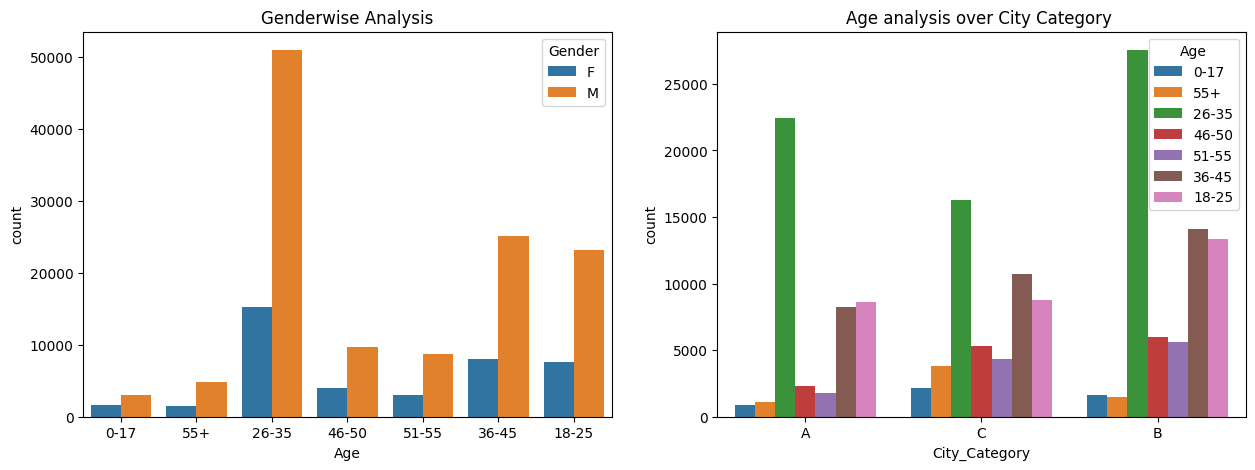

In [ ]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Age',hue='Gender',data=df)
plt.title('Genderwise Analysis')

plt.subplot(1,2,2)
sns.countplot(x='City_Category',hue='Age',data=df)
plt.title('Age analysis over City Category ')

# Based on the graph we can Clearly state that the 30% Males of age group of 26-35 have purchase the products with 9% females making them the gighest of ll age group followed by the age group of 36-45
# when compared the City category we see that the maximum products sold were from City C however the age group of 26-35 did the highest overall purchase in all three cities


Insights:

1) Based on the graph we can Clearly state that the 30% Males of age
group of 26-35 have purchase the products with 9% females making them
the highest of all age group followed by the age group of 36-45

2) when compared the City category we see that the maximum products sold
were from City C however the age group of 26-35 did the highest overall
purchase in all three cities

In [ ]:
#checking the impact of age on product category

In [ ]:
pd.crosstab(df["Age"],df['Product_Category'],margins=True,normalize=True)*100

Product_Category,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,All
Age,,,,,,,,,,,,,,,,,,,
0-17,0.682758,0.151457,0.230190,0.152659,0.782527,0.076329,0.006010,0.420714,0.003606,0.024041,0.131623,0.021637,0.019233,0.009015,0.032455,0.039667,0.001202,0.006010,2.791134
18-25,5.064189,0.835417,0.846836,0.438744,5.343062,0.703193,0.084143,3.335657,0.012621,0.114194,0.902731,0.087148,0.139436,0.045076,0.189321,0.288489,0.007212,0.051688,18.489158
26-35,10.622416,1.623353,1.408188,0.767502,11.247476,1.480311,0.296904,8.124579,0.024642,0.317338,1.831306,0.207953,0.370829,0.096764,0.421315,0.753678,0.021637,0.191124,39.807313
36-45,4.960213,0.903933,0.723627,0.434537,5.371310,0.706198,0.150255,4.288273,0.021036,0.238004,0.914150,0.164679,0.215165,0.046880,0.269858,0.332965,0.023440,0.128618,19.893139
46-50,1.866165,0.384652,0.234999,0.187518,2.145639,0.285484,0.070319,1.936484,0.006611,0.096764,0.383450,0.091956,0.099769,0.030051,0.112391,0.153861,0.021637,0.056496,8.164247
51-55,1.658212,0.337172,0.185114,0.131022,1.793442,0.289090,0.050486,1.712304,0.006611,0.082340,0.250625,0.079335,0.095562,0.030652,0.084744,0.126214,0.019233,0.074526,7.006683
55+,0.784931,0.178503,0.084744,0.053491,0.981465,0.143644,0.024041,1.137129,0.001202,0.063107,0.106981,0.060703,0.060102,0.014424,0.040268,0.057698,0.013222,0.042672,3.848327
All,25.638884,4.414487,3.713698,2.165473,27.664920,3.684248,0.682157,20.955140,0.076329,0.935787,4.520867,0.713410,1.000096,0.272863,1.150351,1.752572,0.107582,0.551135,100.000000


Text(0.5, 1.0, 'Age analysis over City Category ')

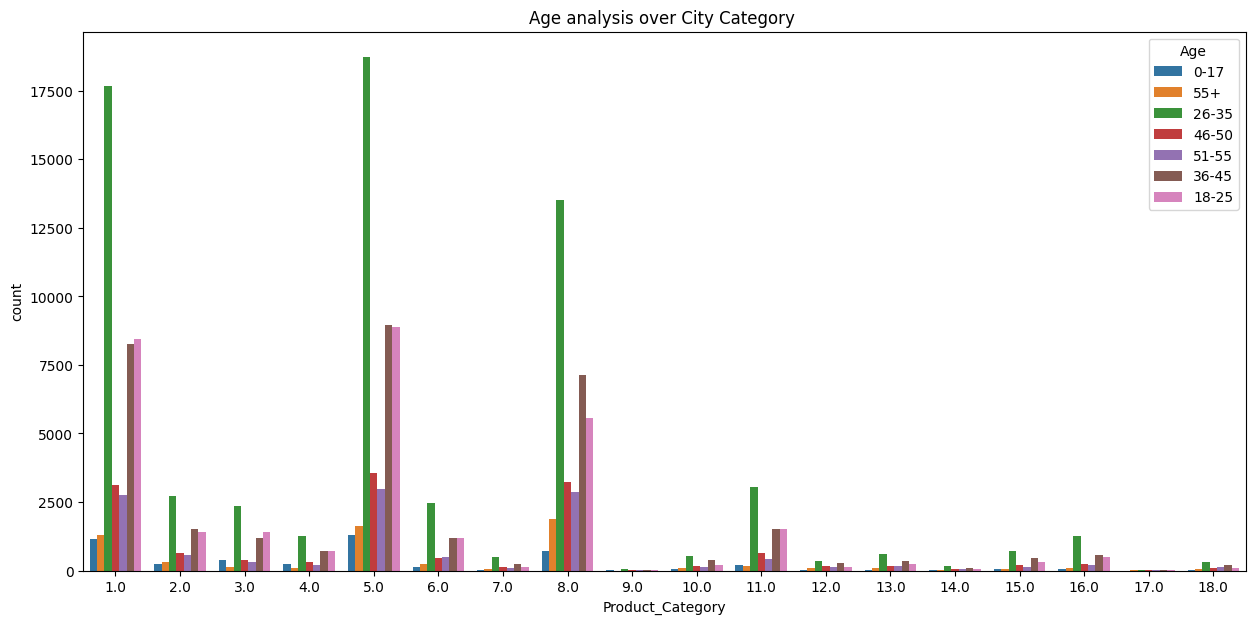

In [ ]:
plt.figure(figsize=(15, 7))

sns.countplot(x='Product_Category',hue='Age',data=df)
plt.title('Age analysis over City Category ')

#the highest sales were of product category 5 followed by 1 and 8 with age group 26-35 being the highest contributors over the sales however we also see the age group 36-45 and 18-25 with high sales

Insights:

1)the highest sales were of product category 5 followed by 1 and 8 with
age group 26-35 being the highest contributors over the sales however
we also see the age group 36-45 and 18-25 with high sales

Detecting Outliers wrt Genders

In [ ]:
import numpy as np
def detect_outliers_iqr(df):
    # Calculate the first quartile (Q1) and the third quartile (Q3)
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = [x for x in df if x < lower_bound or x > upper_bound]
    return outliers



Outlier Detection

In [ ]:
# Detecting Ouutliers for genders

m=detect_outliers_iqr(df[df['Gender']=='M']['Purchase'].values)
m_series = pd.Series(m) #checking Outliers List for males

f=detect_outliers_iqr(df[df['Gender']=='F']['Purchase'].values)
f_series = pd.Series(f) # Checking Outliers list for females

In [ ]:
[[m_series.value_counts(ascending=True).nlargest(5)],

[f_series.value_counts(ascending=True).nlargest(5)]]

[[23446.0    4
  23349.0    3
  23249.0    3
  23227.0    3
  23912.0    3
  dtype: int64],
 [Series([], dtype: int64)]]

Insights:
The outliers in the product category was mostly of average 2330.

Performing CLT analysis based on dependency on Genders

In [ ]:
# Checking for Average spending amounts

female_transactions = df[df['Gender'] == 'F']
male_transactions = df[df['Gender'] == 'M']

average_spending_female = female_transactions['Purchase'].mean()
average_spending_male = male_transactions['Purchase'].mean()

print("Average spending per transaction for Female customers:", average_spending_female)
print("Average spending per transaction for Male customers:", average_spending_male)

Average spending per transaction for Female customers: 8778.514205584685
Average spending per transaction for Male customers: 9482.653849528231


Checking for dependancy on Gender

In [ ]:
# Checking for Gender dependancy (FEMALES)

sample_size = 1000
confidence_level = 0.95

# Random sample from the female transactions
female_transactions = df[df['Gender'] == 'F']
sample = female_transactions['Purchase'].sample(n=sample_size)

# Calculate the sample mean
sample_mean = sample.mean()

# Calculate the standard error
std_error = np.std(sample) / np.sqrt(sample_size)

# Calculate the margin of error
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * std_error

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")


Sample mean: 8982.215
Confidence Interval: (8677.152128807083, 9287.277871192917)


In [ ]:
# Checking for Gender dependancy (MALES)

sample_size = 1000
confidence_level = 0.95

# Random sample from the female transactions
Male_transactions = df[df['Gender'] == 'M']
sample = Male_transactions['Purchase'].sample(n=sample_size)

# Calculate the sample mean
sample_mean = sample.mean()

# Calculate the standard error
std_error = np.std(sample) / np.sqrt(sample_size)

# Calculate the margin of error
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * std_error

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")

Sample mean: 9428.371
Confidence Interval: (9126.58569353042, 9730.156306469578)


Insights:
Since the confidence intervals of males and females coincide, we cannot
firmly confirm if the women spend more than men

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index().head()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,142437.0
1,1000002,M,206167.0
2,1000003,M,100271.0
3,1000004,M,70456.0
4,1000005,M,242828.0


In [ ]:
# histogram of average amount spend for each customer - Male & Female

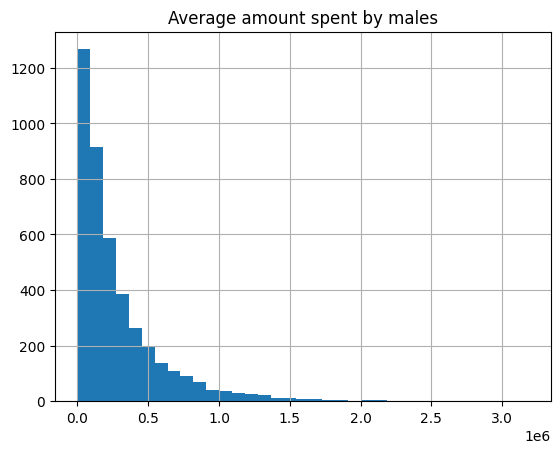

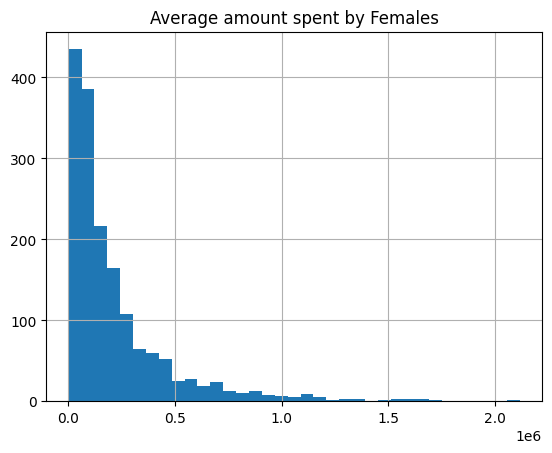

In [ ]:
amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.title('Average amount spent by Females')
plt.show()

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

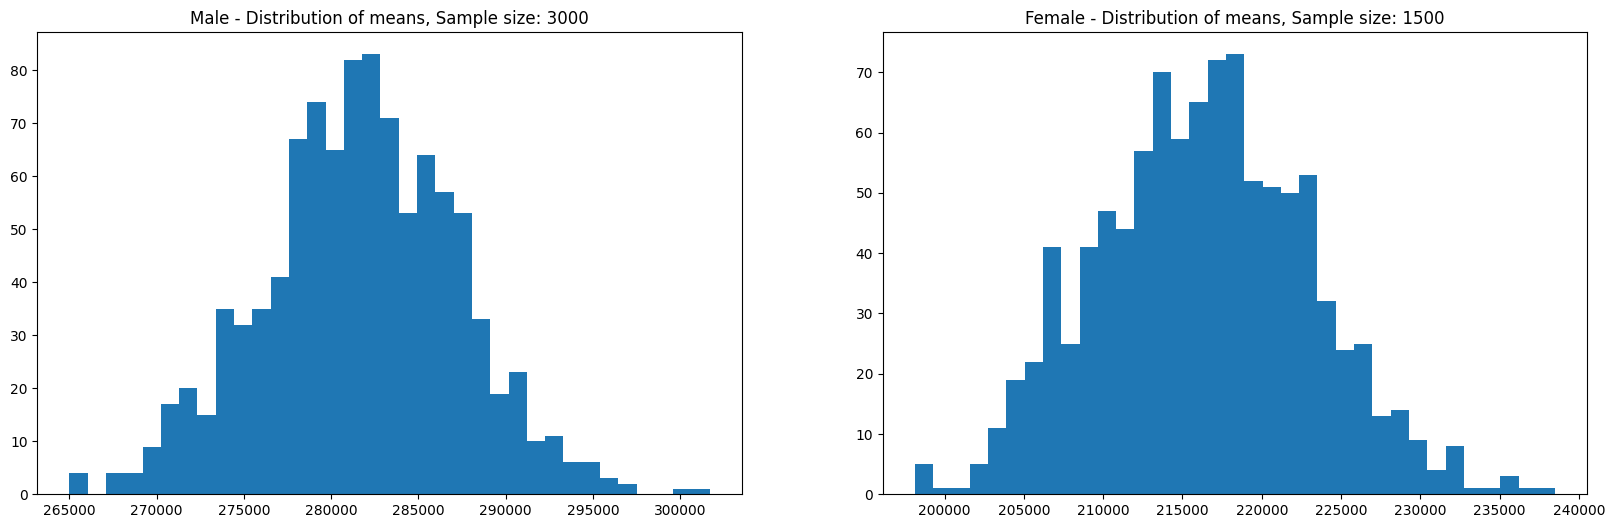

In [ ]:
#Distribution For Gender wise Sample Means


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 281579.28
Population mean - Mean of sample means of amount spend for Female: 216310.47

Male - Sample mean: 281669.19 Sample std: 309143.74
Female - Sample mean: 216323.90 Sample std: 250396.72


**Checking for dependancy on Maratial Status**

In [ ]:
amt_df=df.groupby(['User_ID','Marital_Status'])['Purchase'].sum()
amt_df=amt_df.reset_index().head()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0.0,142437.0
1,1000002,0.0,206167.0
2,1000003,0.0,100271.0
3,1000004,1.0,70456.0
4,1000005,1.0,242828.0


In [ ]:
amt_df['Marital_Status'].value_counts()

0.0    3355
1.0    2433
Name: Marital_Status, dtype: int64

In [ ]:
married_samp_size=3000
unmarried_samp_size=3000
num_repet=1000

married_means=[]
unmarried_means=[]

for i in range (num_repet):
  married_mean = amt_df[amt_df['Marital_Status']==1].sample(married_samp_size,replace=True)['Purchase'].mean()
  unmarried_mean = amt_df[amt_df['Marital_Status']==0].sample(married_samp_size,replace=True)['Purchase'].mean()

  married_means.append(married_mean)
  unmarried_means.append(unmarried_mean)

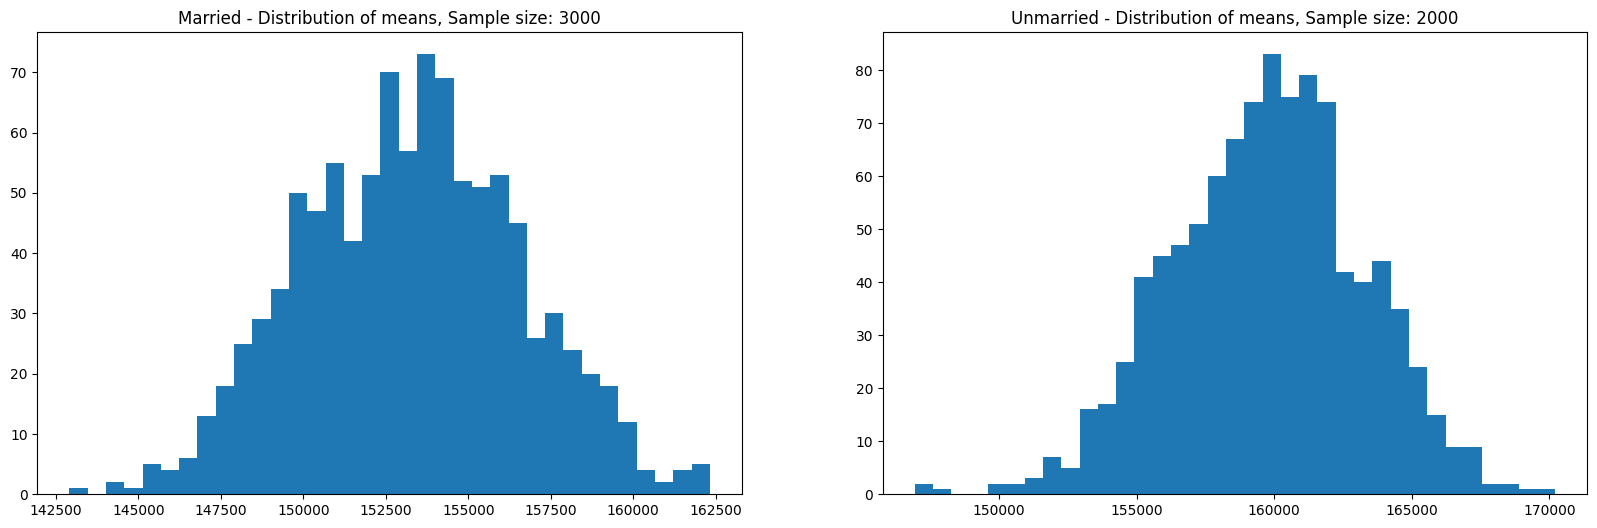

Population mean - Mean of sample means of amount spend for Married: 153264.95
Population mean - Mean of sample means of amount spend for Unmarried: 159733.29

Married - Sample mean: 153353.45 Sample std: 177866.62
Unmarried - Sample mean: 159908.01 Sample std: 180940.89


In [ ]:

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(unmarried_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(married_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarried_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (245584.31, 268664.19)
Unmarried confidence interval of means: (257627.03, 277548.76)


In [ ]:
# Checking Average for Married and Unmarried

Married_transactions = df[df['Marital_Status'] == 1.0]
Unmarried_transactions = df[df['Marital_Status'] == 0.0]

average_Married = Married_transactions['Purchase'].mean()
average_Unmarried = Unmarried_transactions['Purchase'].mean()

print("Average spending per transaction for Married customers:", average_Married)
print("Average spending per transaction for Unmarried customers:", average_Unmarried)

Average spending per transaction for Married customers: 9322.682130861409
Average spending per transaction for Unmarried customers: 9299.704566977241


In [ ]:
# Checking for Maratial Status dependancy (MARRIED)

sample_size = 1000
confidence_level = 0.95

# Random sample from the marid transactions
Marid_transactions = df[df['Marital_Status'] == 1.0]
sample = Marid_transactions['Purchase'].sample(n=sample_size)

# Calculate the sample mean
sample_mean = sample.mean()

# Calculate the standard error
std_error = np.std(sample) / np.sqrt(sample_size)

# Calculate the margin of error
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * std_error

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")

Sample mean: 9418.148
Confidence Interval: (9103.068809009957, 9733.227190990041)


In [ ]:
# Checking for Maratial Status dependancy (UNMARRIED)

sample_size = 1000
confidence_level = 0.95

# Random sample from the marid transactions
Unmarid_transactions = df[df['Marital_Status'] == 0.0]
sample = Unmarid_transactions['Purchase'].sample(n=sample_size)

# Calculate the sample mean
sample_mean = sample.mean()

# Calculate the standard error
std_error = np.std(sample) / np.sqrt(sample_size)

# Calculate the margin of error
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * std_error

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")

Sample mean: 9168.969
Confidence Interval: (8851.882250662109, 9486.05574933789)


Insights:

Since the confidence intervals overlap, we cannot firmly confirm if
martial status effect the purchasing
However, we see based on CLT analysis that married population spend
more on the than the unmarried people so Company should more on the
unmarried population by putting additional bachelor discounts or offers
for unmarried population

Checking For Dependency over age

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0


In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 500
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (285960.66, 313868.81)
For age 36-45 --> confidence interval of means: (248988.21, 283658.69)
For age 18-25 --> confidence interval of means: (247739.85, 282372.29)
For age 46-50 --> confidence interval of means: (213526.88, 261822.81)
For age 51-55 --> confidence interval of means: (210822.72, 255531.36)
For age 55+ --> confidence interval of means: (143158.19, 179945.53)
For age 0-17 --> confidence interval of means: (163237.57, 223848.88)


Insights:
Customers in the age 18-45 spend more money than the others, So company
should focus on acquisition of customers who are in the age 18-45

Final insights:

1) Based on the Dataset provided we clearly observe that the
count of Males purchasing the products are greater than the
females

2) City B is more successful in terms of sales compared to A and
C.

3) When compared to marital status we see that the count of
Unmarried Customers and sum of purchase was higher
compared to married people, however when compared to
the average values we found out that the average spend of
married customers was more compared to unmarried
customers.

4) When compared with age analysis we found that the males
age group of 26-33 did spend higher than the females of
same age group for all three cities.

5) The most attracted product category was 5 , 1 and 8
respectively for age group 26-35.

6) When performed CLT analysis we were unable to firmly
confirm the results as the values did coincide however based
on the highest values we were able to infer that:

a) Males purchased more than females.

b) Married people did better and consistent purchasing than
unmarried.

c) The age group of 18-45 did spend higher, especially for the
group 26-35

Recommendations:

1) Men spent more money than women, so company should
focus on retaining the male customers and getting more
male customers.

2) Product Category - 1, 5, 8, & 11 have highest purchasing
frequency. it means these are the products in these
categories are liked more by customers. Company can focus
on selling more of these products or selling more of the
products which are purchased less.

3) Unmarried customers spend more money than married
customers, o company should focus on acquisition of
Unmarried customers.

4) Customers in the age 18-45 spend more money than the
others, so company should focus on acquisition of customers
who are in the age 18-45

5) Male customers living in City C spend more money than other
male customers living in B or C, selling more products in the
City C will help the company increase the revenue.